In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})


{'width': 1000, 'height': 600, 'scroll': True}

# Data Analysis with Python
_T.J. Langford_  
_Yale Center for Reasearch Computing_  
_June 10, 2022_  

# Overview

- Introduction to `numpy` and `matplotlib`
- Data processing and analysis with `numpy`
- Data visualization with `matplotlib`
- Real-world example of data processing 

# Tools and Requirements

- Language: Python 3.6+
- Modules: `numpy`, `matplotlib`
- Jupyter notebook

# Github Repository

- The materials from this tutorial are available on GitHub: https://github.com/WrightLaboratory/data_analysis
- Includes this Jupyter notebook and test data file
- Slides can be viewed here: https://wrightlaboratory.github.io/data_analysis/#/
- Live notebook environment here: https://mybinder.org/v2/gh/WrightLaboratory/data_analysis/HEAD

# Data Processing with `numpy`

In [2]:
import numpy as np

# What is Numpy?

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

[User Guide](https://docs.scipy.org/doc/numpy-1.16.1/)

## N-dimensional array objects

- Fundamental basis of numpy is the `array` object
- 1D array ~ vector
- 2D array ~ matrix  
- nD array (n > 2) ~ tensor

### Creating arrays

Arrays can be created in a variety of ways. The most common are either empty:

In [48]:
a = np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

or you can create them from an existing `list`:

In [49]:
b = np.array([0,1,2,3,4,5,6,7,8,9])
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Array properties

Arrays have a few key properties:

- Data type (float, int, etc)
- Number of dimensions
- Shape 
- Size


In [50]:
print(a.dtype)
print(b.dtype)

float64
int64


In [51]:
a.shape

(10,)

In [52]:
c = np.array([[0,1,2,3],[4,5,6,7]])
c

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [53]:
c.shape

(2, 4)

### Array operations

We can also act on these arrays with specific operations:

- add, subtract, multiply, and divide by scalars or other arrays

In [56]:
a = np.multiply(b, 4)
a

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36])

In [57]:
np.multiply(a, b)

array([  0,   4,  16,  36,  64, 100, 144, 196, 256, 324])

- extract statistics about the array (minimum, maximum, RMS, etc)

In [58]:
np.max(b)

9

In [59]:
np.mean(a)

18.0

In [60]:
np.std(a)

11.489125293076057

- sum array elements along an axis: 

In [61]:
np.sum(c, axis=0)

array([ 4,  6,  8, 10])

### Filter based on values 

Array elements can be selected based on their values (or values of different arrays)

In [62]:
print(a)

[ 0  4  8 12 16 20 24 28 32 36]


In [63]:
a > 5

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True])

This array of `True`/`False` values can then filter either `a` or other arrays:

In [64]:
a[a > 5]

array([ 8, 12, 16, 20, 24, 28, 32, 36])

In [65]:
b[a > 5]

array([2, 3, 4, 5, 6, 7, 8, 9])

We will use this to filter some real data later in the tutorial.

### Import and Export Arrays 

Numpy has two main ways of exporting and importing data:

- Saving human-readable text file with `np.savetxt`:

In [18]:
np.savetxt('test.txt', c, fmt='%f', delimiter=',', header='My favorite array')

In [19]:
cat test.txt

# My favorite array
0.000000,1.000000,2.000000,3.000000
4.000000,5.000000,6.000000,7.000000


- faster, more efficient numpy binary data (`test.npy`):

In [20]:
np.save('test.npy', c)

- Reading text or binary data with `np.loadtxt` or `np.fromfile`

In [21]:
np.loadtxt('test.txt',delimiter=',')

array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]])

- `Numpy` and `pandas` also provide a variety of tools to read specific data formats (csv, binary, etc.) 

## Random Number Generation with `numpy`

Numpy has a full suite of tools for generating random numbers. Very helpful for Monte Carlo simulations or toy data.

Here we will generate 100k random floats from a normal distribution with `mean = 2.0` and `sigma = 1.0`. 

In [22]:
r = np.random.normal(loc=2, scale=1, size=100000)
print(r[0:10])

[2.38888533 1.24687626 1.52123665 2.50354874 1.55382545 1.50751435
 0.24556227 1.76019075 3.09419894 2.15378342]


We can randomly select elements from an array:

In [23]:
np.random.choice(a, size=2)

array([0., 0.])

All the "heavy-lifting" is done in `C`, so `numpy`-based work can be _very_ fast.

### Random Number Example: Monte Carlo `pi`

We can perform a Monte Carlo-based simulation to calculate `pi` using two uniform random number generators. 

In [24]:
def mc_pi(num_trials):
    x = np.random.uniform(low=0.0, high=1.0, size=num_trials)
    y = np.random.uniform(low=0.0, high=1.0, size=num_trials)

    r = x**2 + y**2
    
    return len(r[r<1])*4/num_trials
    

In [25]:
for n in [10,100,1000,10000,100000,1000000,10000000]:
    print(f"{n}: {mc_pi(n)}")

10: 3.6
100: 3.36
1000: 3.208
10000: 3.1592
100000: 3.14036
1000000: 3.141168
10000000: 3.1413536


## Plotting with Matplotlib

In [26]:
import matplotlib.pyplot as plt

## Plotting with Matplotlib 

- Matplotlib is the back-bone of most python plotting and visualization
- It's super flexible and produces both interactive and publication-ready plots
- We'll touch on a few examples to demonstrate the versitility of this module

## Basic 2D Plot

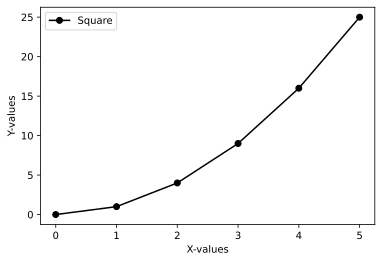

In [27]:
x = np.array([0,1,2,3,4,5])
y = np.power(x, 2)
plt.plot(x, y, marker='o', color='k', label='Square');
plt.xlabel('X-values');
plt.ylabel('Y-values');
plt.legend(loc=2);

## Scatter plot

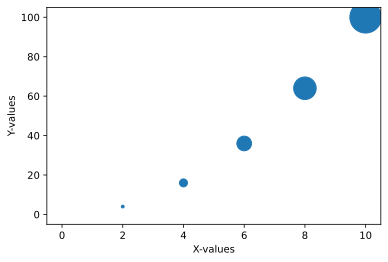

In [28]:
x = np.array([0,2,4,6,8,10])
y = np.power(x, 2)
r = np.power(x, 3)
plt.scatter(x, y, s=r)
plt.xlabel('X-values'); plt.ylabel('Y-values');


## Visualizing Monte Carlo Pi

Using our previously discussed Monte Carlo method for determining `pi`, we can visualize this procedure in a few different ways. 

First, we can make a scatter plot of one determination of Pi and show how the algorithm works. X and Y values are generated with a uniform random distribution and any which fall inside the shaded region (where `x^2 + y^2 <= 1`) are counted. 

(0.0, 1.0)

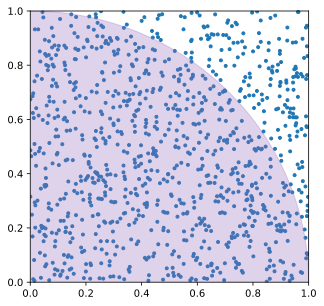

In [29]:
plt.figure(figsize=(5,5))
ax = plt.gca()
circle = plt.Circle((0,0), radius=1, color='C4', alpha=0.3)

num_trials = 1000
x = np.random.uniform(low=0.0, high=1.0, size=num_trials)
y = np.random.uniform(low=0.0, high=1.0, size=num_trials)

plt.scatter(x,y,marker='.')
ax.add_patch(circle)
plt.ylim(0,1)
plt.xlim(0,1)


Next, we can plot the evolution of our MC-generated value of `pi` as we increase the number of samples:

Text(0, 0.5, 'Simulated Value of Pi')

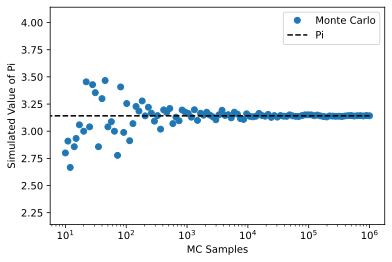

In [30]:
mc_pi_samples = np.logspace(start=1, stop=6, num=100, dtype='int')
mc_pi_values = [mc_pi(x) for x in mc_pi_samples]

plt.plot(mc_pi_samples, mc_pi_values, marker='o', linestyle='None', label='Monte Carlo')
plt.ylim(np.pi-1,np.pi+1)
plt.hlines(np.pi, xmin=0,xmax=np.max(mc_pi_samples), color='k', linestyle='--', label='Pi')
plt.xscale('log');
plt.legend()
plt.xlabel('MC Samples');
plt.ylabel('Simulated Value of Pi')

## Histograms 

Combining `numpy` and `matplotlib` we can begin to generate some of the key plots that are used to display data. One of the most common types of data visualizations are histograms. 

To get started, let's generate some random data using `numpy.random`:

In [31]:
a = np.random.uniform(low=0, high=10, size=1000)
b = np.random.exponential(scale=1, size=1000)

Now we can create a histogram (tabulation of values into discrete bins) and plot the distributions using `matplotlib`:

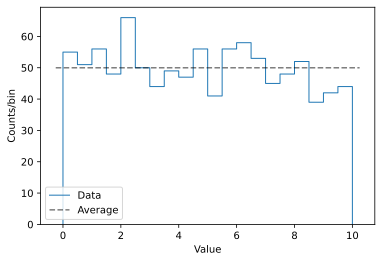

In [32]:
h, bins = np.histogram(a, bins=20, range=(0,10))

plt.stairs(h, bins, label='Data')
plt.hlines(h.mean(), xmin=-0.25,xmax=10.25,linestyles='--', color='k', alpha=0.5, label='Average')

plt.xlabel('Value')
plt.ylabel('Counts/bin')
plt.legend(loc=3)

We can do the same to plot our exponential distribution of data, but this time we can set the y-scale to be `log` to better highlight the distribution:

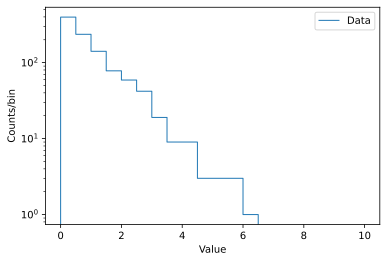

In [33]:
h, bins = np.histogram(b, bins=20, range=(0,10))

plt.stairs(h, bins, label='Data')
plt.xlabel('Value')
plt.ylabel('Counts/bin')
plt.legend(loc=0);

plt.yscale('log')

## Data Processing with `Numpy`

Now that we have a basic familiarity with `numpy`, we will attempt to process some low-level data produced by a PMT connected to a scintillator cell. 

A few key details about the data file:
- Recorded by a digitizer (similar to an oscilloscope, records triggered waveforms)
- 2-character unsigned binary data
- Each trigger window is 300 samples long
- Each trigger has a 6 long-word header containing information about the event:
    - Time-stamp, event number, channel ID, etc.

In [34]:
data_file = '../data/180822-EJ309-1700V-Cf252.dat'

In [35]:
f = open(data_file, 'r')

Channel: 1, Trigger: 0, TimeStamp: 294763


Text(0, 0.5, 'ADC')

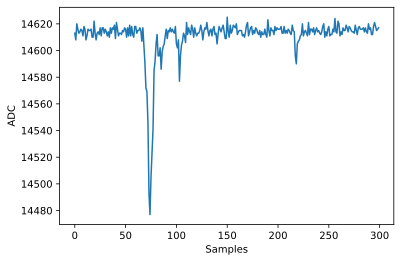

In [36]:
header = np.fromfile(f, dtype='I', count=4)
print(f"Channel: {header[1]}, Trigger: {header[2]}, TimeStamp: {header[3]}")

trace = np.fromfile(f, dtype='<H', count=300)
plt.plot(trace)
plt.xlabel('Samples');plt.ylabel('ADC')

### Analysis Function

In [37]:
def data_reader(file_name, num_ev=10000):
    header_size = 4
    window_size = 300
    
    with open(file_name, 'r') as d:
        # define data structure
        dtype = [('time_stamp','f4'), ('en','f4'), ('psd', 'f4')]
        data = np.zeros(shape=num_ev, dtype=dtype)
        
        for i in range(num_ev):
            header = np.fromfile(d, dtype='I', count=header_size)
            
            data['time_stamp'][i] = header[3]
            
            trace = np.fromfile(d, dtype='<H', count=window_size)
            
            # Average the first 30 samples to determine what "zero" is
            bl = np.average(trace[0:30])

            # Subtract off the baseline 
            trace = np.subtract(trace, bl)

            # find the minimum of the pulse
            peak_loc = np.argmin(trace)
            
            # Integrate the full pulse
            data['en'][i] = -np.sum(trace[peak_loc-30:peak_loc+100])
            
            # Integrate the tail of the pulse, then take the ratio to the full
            data['psd'][i] = -np.sum(trace[peak_loc+10:peak_loc+100])
            data['psd'][i] /= data['en'][i]
            
    return data

In [38]:
data = data_reader(data_file, num_ev=50000)

/var/folders/h1/l6rjm3sj20ng18gpmvxvrddh0000gn/T/ipykernel_54226/3298946504.py:31: RuntimeWarning: divide by zero encountered in float_scalars
  data['psd'][i] /= data['en'][i]


In [39]:
from matplotlib.colors import LogNorm

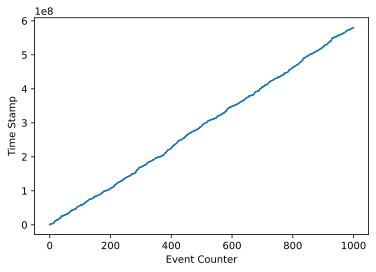

In [40]:
plt.plot(data['time_stamp'][0:1000], marker=',')
plt.xlabel('Event Counter');
plt.ylabel('Time Stamp');

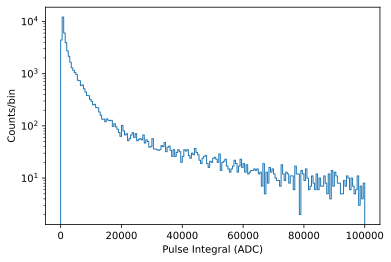

In [41]:
h, bins = np.histogram(data['en'], bins=200, range=(0,100000))

plt.stairs(h, bins)
plt.yscale('log');
plt.xlabel('Pulse Integral (ADC)');
plt.ylabel('Counts/bin');

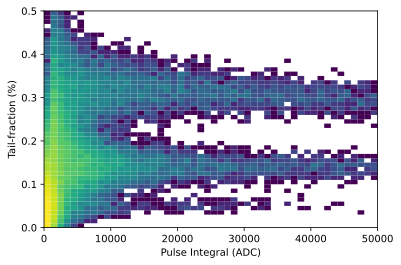

In [42]:
plt.hist2d(data['en'], data['psd'], bins=50, range=((0,50000),(0,0.5)), norm=LogNorm());
plt.xlabel('Pulse Integral (ADC)');
plt.ylabel('Tail-fraction (%)');

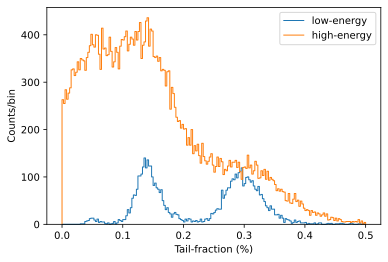

In [43]:
filter = data['en']>15000
h, bins = np.histogram(data['psd'][filter], bins=200, range=(0,0.5))
plt.stairs(h, bins, label='low-energy');

filter = data['en']<15000
h, bins = np.histogram(data['psd'][filter], bins=200, range=(0,0.5))
plt.stairs(h, bins, label='high-energy');

plt.xlabel('Tail-fraction (%)');
plt.ylabel('Counts/bin');plt.legend()

## Conclusions

- We've only scratched the surface of what python can do for data analysis. 
- Online Resources:
    - Numpy (https://numpy.org)
    - Matplotlib (https://matplotlib.org)
    - HEP-specific tools: SciKit-HEP (https://scikit-hep.org)
    
- Further reading (O'Reilly Books available through Yale Library):
    - [Data Analysis with Python by Wes McKinney](https://learning.oreilly.com/library/view/python-for-data/9781491957653/)
    - [High Performance Python](https://learning.oreilly.com/library/view/high-performance-python/9781492055013/)
